In [1]:
import pandas as pd

In [2]:
#Aim: Transform monthly sampled dataset to Monsoon-seasonal per the classification of McRobie et al.
#Specifically:
#    NW_Aus = DJF
#    NE_Aus = DJF
#    IO = DJF
#    EEP = DJF
#    MC = DJF
#    
#    ISM = JJA
#    EASM = JJA

# Read in full dataset, which is split into land/ocean sections already
df = pd.read_csv('Prec_Mean_by_Region.csv')

# Extract data from DataFrame to lists
dates = df['Date'].tolist()
nw_aus = df['NW_Aus_Prec_Mean'].tolist()
ne_aus = df['NE_Aus_Prec_Mean'].tolist()
mc = df['MC_Prec_Mean'].tolist()
io = df['IO_Prec_Mean'].tolist()
ism = df['ISM_Prec_Mean'].tolist()
easm = df['EASM_Prec_Mean'].tolist()
eep = df['EEP_Prec_Mean'].tolist()

# Create list of index numbers where December, January, February dates occur
index = []
for i in range(len(df)):
    index.append(i)

djf_index = []
for i in index:
    if i%12 == 0:
        djf_index.append(i) #January
    elif i%12 == 1:
        djf_index.append(i) # February
    elif i%12 == 11:
        djf_index.append(i) # December
        
ndjfm_index = [] ## Extending the search to 5 months
for i in index:
    if i%12 == 0:
        ndjfm_index.append(i) #January
    elif i%12 == 1:
        ndjfm_index.append(i) # February
    elif i%12 == 2:
        ndjfm_index.append(i) # March
    elif i%12 == 10:
        ndjfm_index.append(i) # November
    elif i%12 == 11:
        ndjfm_index.append(i) # December
    
jja_index = []
for i in index:
    if i%12 == 5:
        jja_index.append(i) #June
    if i%12 == 6:
        jja_index.append(i) # July
    if i%12 == 7:
        jja_index.append(i) # August
        
mjjas_index = [] ## Extending the search to 5 months
for i in index:
    if i%12 == 4:
        mjjas_index.append(i) #May
    elif i%12 ==5:
        mjjas_index.append(i) #June
    elif i%12 == 6:
        mjjas_index.append(i) # July
    elif i%12 == 7:
        mjjas_index.append(i) # August
    elif i%12 == 8:
        mjjas_index.append(i) # September

In [6]:
easm

[37.87088891954133,
 20.06778355078264,
 24.464401815876816,
 51.09119028033632,
 123.47902714122424,
 183.62062095873284,
 195.7956749887177,
 193.80829446966,
 192.9711159214829,
 179.94108333009663,
 144.00437632474032,
 73.18244395111546,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 35.602445443471275,
 20.896257226665814,
 20.65565580852104,
 48.6989570386482,
 133.91952832539877,
 181.9244148947976,
 202.9804657444809,
 200.1320662064986,
 178.06752557465524,
 187.0955811702844,
 134.0407640283758,
 65.9680044000799,
 nan,
 nan,

In [7]:
# Loop through lists using modulo 12 to append required values to a list...do this to construct each season
# Then zip dates and values to dictionary and chronologitcally sort

############################################################################################################################
############################################################################################################################
############################################################################################################################
# December-January-February
def djf_regions():
    dates_djf = []
    nw_aus_djf = []
    ne_aus_djf = []
    mc_djf = []
    io_djf = []
    eep_djf = []
    
    for i in djf_index:
        dates_djf.append(dates[i])
        nw_aus_djf.append(nw_aus[i])
        ne_aus_djf.append(ne_aus[i])
        mc_djf.append(mc[i])
        io_djf.append(io[i])
        eep_djf.append(eep[i])
    
    return dates_djf,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf

dates_djf,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf = djf_regions()
djf = pd.DataFrame(list(zip(dates_djf,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf)),
                   columns = ['Date','NW_Aus_Prec_Mean','NE_Aus_Prec_Mean','MC_Prec_Mean','IO_Prec_Mean','EEP_Prec_Mean'])

def djf_regions_0():    
    nw_aus_djf = []
    ne_aus_djf = []
    mc_djf = []
    io_djf = []
    eep_djf = []
    
    for i in range(len(df)):
        actual_index = i
        if actual_index in djf_index:
            nw_aus_djf.append(nw_aus[actual_index])
            ne_aus_djf.append(ne_aus[actual_index])
            mc_djf.append(mc[actual_index])
            io_djf.append(io[actual_index])
            eep_djf.append(eep[actual_index])
        else:
            nw_aus_djf.append(0)
            ne_aus_djf.append(0)
            mc_djf.append(0)
            io_djf.append(0)
            eep_djf.append(0)
    
    return dates,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf

dates,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf = djf_regions_0()
djf_0 = pd.DataFrame(list(zip(dates,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf)),
                     columns=['Date','NW_Aus_Prec_Mean','NE_Aus_Prec_Mean','MC_Prec_Mean','IO_Prec_Mean','EEP_Prec_Mean'])
############################################################################################################################
############################################################################################################################
############################################################################################################################
# June-July-August
def jja_regions():  
    dates_jja = []
    ism_jja = []
    easm_jja = []
    
    for i in jja_index:
        dates_jja.append(dates[i])
        ism_jja.append(ism[i])
        easm_jja.append(easm[i])
    
    return dates_jja,ism_jja,easm_jja

dates_jja,ism_jja,easm_jja=jja_regions()
jja = pd.DataFrame(list(zip(dates_jja,ism_jja,easm_jja)),
                   columns = ['Date','ISM_Prec_Mean','EASM_Prec_Mean'])

def jja_regions_0():  
    ism_jja = []
    easm_jja = []
    
    for i in range(len(df)):
        actual_index = i
        if actual_index in jja_index:
            ism_jja.append(ism[actual_index])
            easm_jja.append(easm[actual_index])
        else:
            ism_jja.append(0)
            easm_jja.append(0)
    
    return dates,ism_jja,easm_jja

dates,ism_jja,easm_jja=jja_regions_0()
jja_0 = pd.DataFrame(list(zip(dates,ism_jja,easm_jja)),
                   columns = ['Date','ISM_Prec_Mean','EASM_Prec_Mean'])
############################################################################################################################
############################################################################################################################
############################################################################################################################
# November-December-January-February-March
def ndjfm_regions():
    dates_ndjfm = []
    nw_aus_ndjfm = []
    ne_aus_ndjfm = []
    mc_ndjfm = []
    io_ndjfm = []
    eep_ndjfm = []
    
    for i in ndjfm_index:
        dates_ndjfm.append(dates[i])
        nw_aus_ndjfm.append(nw_aus[i])
        ne_aus_ndjfm.append(ne_aus[i])
        mc_ndjfm.append(mc[i])
        io_ndjfm.append(io[i])
        eep_ndjfm.append(eep[i])
    
    return dates_ndjfm,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm

dates_ndjfm,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm = ndjfm_regions()
ndjfm = pd.DataFrame(list(zip(dates_ndjfm,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm)),
                     columns=['Date','NW_Aus_Prec_Mean','NE_Aus_Prec_Mean','MC_Prec_Mean','IO_Prec_Mean','EEP_Prec_Mean'])

def ndjfm_regions_0():
    nw_aus_ndjfm = []
    ne_aus_ndjfm = []
    mc_ndjfm = []
    io_ndjfm = []
    eep_ndjfm = []
    
    for i in range(len(df)):
        actual_index = i
        if actual_index in ndjfm_index:
            nw_aus_ndjfm.append(nw_aus[actual_index])
            ne_aus_ndjfm.append(ne_aus[actual_index])
            mc_ndjfm.append(mc[actual_index])
            io_ndjfm.append(io[actual_index])
            eep_ndjfm.append(eep[actual_index])
        else:
            nw_aus_ndjfm.append(0)
            ne_aus_ndjfm.append(0)
            mc_ndjfm.append(0)
            io_ndjfm.append(0)
            eep_ndjfm.append(0)
    
    return dates,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm

dates,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm = ndjfm_regions_0()
ndjfm_0 = pd.DataFrame(list(zip(dates,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm)),
                     columns=['Date','NW_Aus_Prec_Mean','NE_Aus_Prec_Mean','MC_Prec_Mean','IO_Prec_Mean','EEP_Prec_Mean'])
############################################################################################################################
############################################################################################################################
############################################################################################################################
# May-June-July-August-September

def mjjas_regions():  
    dates_mjjas = []
    ism_mjjas = []
    easm_mjjas = []
    
    for i in mjjas_index:
        dates_mjjas.append(dates[i])
        ism_mjjas.append(ism[i])
        easm_mjjas.append(easm[i])
    
    return dates_mjjas,ism_mjjas,easm_mjjas

dates_mjjas,ism_mjjas,easm_mjjas = mjjas_regions()
mjjas = pd.DataFrame(list(zip(dates_mjjas,ism_mjjas,easm_mjjas)),
                     columns=['Date','ISM_Prec_Mean','EASM_Prec_Mean'])

def mjjas_regions_0():  
    ism_mjjas = []
    easm_mjjas = []
    
    for i in range(len(df)):
        actual_index = i
        if actual_index in mjjas_index:
            ism_mjjas.append(ism[actual_index])
            easm_mjjas.append(easm[actual_index])
        else:
            ism_mjjas.append(0)
            easm_mjjas.append(0)
    
    return dates,ism_mjjas,easm_mjjas

dates,ism_mjjas,easm_mjjas = mjjas_regions_0()
mjjas_0 = pd.DataFrame(list(zip(dates,ism_mjjas,easm_mjjas)),
                     columns=['Date','ISM_Prec_Mean','EASM_Prec_Mean'])

In [8]:
mjjas_0

,Date,ISM_Prec_Mean,EASM_Prec_Mean
0,16-01-1611,0.000000,0.000000
1,16-02-1611,0.000000,0.000000
2,16-03-1611,0.000000,0.000000
3,16-04-1611,0.000000,0.000000
4,16-05-1611,185.711487,123.479027
...,...,...,...
4711,16-08-2003,276.147302,202.427148
4712,16-09-2003,254.998174,173.691143
4713,16-10-2003,0.000000,0.000000
4714,16-11-2003,0.000000,0.000000


In [9]:
# Save DataFrames as .csv
index = False

#djf.to_csv('DJF_Mean_Prec_Regions.csv',index=index)
#djf_0.to_csv('DJF_0_Mean_Prec_Regions.csv',index=index)
#
#jja.to_csv('JJA_Mean_Prec_Regions.csv', index=index)
#jja_0.to_csv('JJA_0_Mean_Prec_Regions.csv',index=index)
#
#ndjfm.to_csv('NDJFM_Mean_Prec_Regions.csv',index=index)
#ndjfm_0.to_csv('NDJFM_Mean_Prec_Regions.csv',index=index)
#
#mjjas.to_csv('MJJAS_Mean_Prec_Regions.csv',index=index)
#mjjas_0.to_csv('MJJAS_0_Mean_Prec_Regions.csv',index=index)

In [11]:
# Keep nan values in place
def djf_regions_0_nan():    
    nw_aus_djf = []
    ne_aus_djf = []
    mc_djf = []
    io_djf = []
    eep_djf = []
    
    for i in range(len(df)):
        actual_index = i
        nan_checker = nw_aus[actual_index] # If is .nan in nw_aus, then is .nan in every region
        if math.isnan(nan_checker) is False:
            if actual_index in djf_index:
                nw_aus_djf.append(nw_aus[actual_index])
                ne_aus_djf.append(ne_aus[actual_index])
                mc_djf.append(mc[actual_index])
                io_djf.append(io[actual_index])
                eep_djf.append(eep[actual_index])
            else:
                nw_aus_djf.append(0)
                ne_aus_djf.append(0)
                mc_djf.append(0)
                io_djf.append(0)
                eep_djf.append(0)
        else:
            nw_aus_djf.append(np.nan)
            ne_aus_djf.append(np.nan)
            mc_djf.append(np.nan)
            io_djf.append(np.nan)
            eep_djf.append(np.nan)
    
    return dates,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf

def jja_regions_0_nan():    
    ism_jja = []
    easm_jja = []
    
    for i in range(len(df)):
        actual_index = i
        nan_checker = ism[actual_index] # If is .nan in nw_aus, then is .nan in every region
        if math.isnan(nan_checker) is False:
            if actual_index in jja_index:
                ism_jja.append(ism[actual_index])
                easm_jja.append(easm[actual_index])
            else:
                ism_jja.append(0)
                easm_jja.append(0)
        else:
            ism_jja.append(np.nan)
            easm_jja.append(np.nan)
    
    return dates,ism_jja,easm_jja

dates,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf = djf_regions_0_nan()
djf_0_nan = pd.DataFrame(list(zip(dates,nw_aus_djf,ne_aus_djf,mc_djf,io_djf,eep_djf)),
                         columns=['Date','NW_Aus_Prec_Mean','NE_Aus_Prec_Mean','MC_Prec_Mean','IO_Prec_Mean','EEP_Prec_Mean'])
#djf_0_nan.to_csv('DJF_0_nan_Mean_Prec_Regions.csv',index=index)

dates,ism_jja,easm_jja=jja_regions_0_nan()
jja_0_nan = pd.DataFrame(list(zip(dates,ism_jja,easm_jja)),
                         columns = ['Date','ISM_Prec_Mean','EASM_Prec_Mean'])
#jja_0_nan.to_csv('JJA_0_nan_Mean_Prec_Regions.csv',index=index)

In [18]:
def mjjas_regions_0_nan():  
    ism_mjjas = []
    easm_mjjas = []
    
    for i in range(len(df)):
        actual_index = i
        nan_checker = ism[actual_index]
        if math.isnan(nan_checker) is False:
            if actual_index in mjjas_index:
                ism_mjjas.append(ism[actual_index])
                easm_mjjas.append(easm[actual_index])
            else:
                ism_mjjas.append(0)
                easm_mjjas.append(0)
        else:
            ism_mjjas.append(np.nan)
            easm_mjjas.append(np.nan)
    
    return dates,ism_mjjas,easm_mjjas

dates,ism_mjjas,easm_mjjas=mjjas_regions_0_nan()
mjjas_0_nan = pd.DataFrame(list(zip(dates,ism_mjjas,easm_mjjas)),
                         columns = ['Date','ISM_Prec_Mean','EASM_Prec_Mean'])
#mjjas_0_nan.to_csv('MJJAS_0_nan_Mean_Prec_Regions.csv',index=index)

def ndjfm_regions_0_nan():
    nw_aus_ndjfm = []
    ne_aus_ndjfm = []
    mc_ndjfm = []
    io_ndjfm = []
    eep_ndjfm = []
    
    for i in range(len(df)):
        actual_index = i
        nan_checker = nw_aus[actual_index]
        if math.isnan(nan_checker) is False:
            if actual_index in ndjfm_index:
                nw_aus_ndjfm.append(nw_aus[actual_index])
                ne_aus_ndjfm.append(ne_aus[actual_index])
                mc_ndjfm.append(mc[actual_index])
                io_ndjfm.append(io[actual_index])
                eep_ndjfm.append(eep[actual_index])
            else:
                nw_aus_ndjfm.append(0)
                ne_aus_ndjfm.append(0)
                mc_ndjfm.append(0)
                io_ndjfm.append(0)
                eep_ndjfm.append(0)
        else:
            nw_aus_ndjfm.append(np.nan)
            ne_aus_ndjfm.append(np.nan)
            mc_ndjfm.append(np.nan)
            io_ndjfm.append(np.nan)
            eep_ndjfm.append(np.nan)
    
    return dates,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm

dates,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm = ndjfm_regions_0_nan()
ndjfm_0_nan = pd.DataFrame(list(zip(dates,nw_aus_ndjfm,ne_aus_ndjfm,mc_ndjfm,io_ndjfm,eep_ndjfm)),
                     columns=['Date','NW_Aus_Prec_Mean','NE_Aus_Prec_Mean','MC_Prec_Mean','IO_Prec_Mean','EEP_Prec_Mean'])
#ndjfm_0_nan.to_csv('NDJFM_0_nan_Mean_Prec_Regions.csv',index=index)

In [16]:
for i in range(len(mjjas_regions_0_nan()[1])):
    print(mjjas_regions_0_nan()[1][i])

0
0
0
0
185.71148723512889
241.44985095262527
256.5159937828779
263.66318552792075
257.29843081235884
0
0
0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0
0
0
0
198.1541486531496
238.8910490423441
268.7311596930027
277.15888550579547
253.5108646452427
0
0
0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

284.8551139563322
274.8054277777672
0
0
0
0
0
0
0
191.7510078787804
244.34007098674772
273.84007558822634
290.25987923741343
271.85587779283526
0
0
0
0
0
0
0
181.5266087204218
250.3203200429678
268.3504088521004
293.6017456710339
275.183842933178
0
0
0
0
0
0
0
193.30191462934016
259.2636343240738
263.2660137608647
290.37567484974863
265.6453783750534
0
0
0
0
0
0
0
185.72030807435516
256.98619361519815
258.9763808876276
299.1719506144524
285.08547394275666
0
0
0
0
0
0
0
200.5910587310791
246.234983676672
279.3424314081669
295.53808545470235
288.16102504730225
0
0
0
0
0
0
0
202.32005245238545
259.6814293116331
277.934414434433
289.647982865572
271.8713724732399
0
0
0
0
0
0
0
203.82425138950347
265.0399380773306
280.5490858346224
293.83645699620246
286.4789895296097
0
0
0
0
0
0
0
186.2511784762144
259.4917994022369
279.60278026908634
304.58896911144257
274.70185260772706
0
0
0
0
0
0
0
212.32722228765488
276.92879424989223
288.52354592680933
291.2425267904997
294.111357319355
0
0
0
0
0
0
0

300.0033199548721
280.11836651563647
0
0
0
0
0
0
0
204.4458450227976
269.09655398130417
267.5434456199408
290.54585497975347
268.8267943263054
0
0
0
0
0
0
0
193.18475406765936
263.10804527103903
259.66096507012844
288.9361012041569
278.6860861539841
0
0
0
0
0
0
0
195.19269335269928
261.16171974241735
260.0109772115946
287.9393379628658
281.56073547005656
0
0
0
0
0
0
0
183.4324148833752
257.84842127263545
272.4774633035064
296.5049661040306
279.73925374150275
0
0
0
0
0
0
0
212.0273512840271
265.70005287826064
273.3032358780503
290.910961908102
270.5114992141724
0
0
0
0
0
0
0
189.2922465711832
257.6438181757927
265.9480204179883
296.17510080933573
271.88246155381205
0
0
0
0
0
0
0
207.09152826070783
252.7593582987785
268.7605748087168
303.9107628248632
276.54369054287673
0
0
0
0
0
0
0
189.24782495498656
256.30714388862253
275.5037151098251
301.7088297843933
277.1562549814582
0
0
0
0
0
0
0
197.91969928443436
267.51740309000013
282.61811804175375
290.00845210552217
280.7480587124825
0
0
0
0

0
0
0
173.47823570966722
224.6053560733795
242.895571321249
264.5342534571886
272.97676488161085
0
0
0
0
0
0
0
192.6308444827795
245.9865464746952
225.58057504296303
273.7296105027199
287.4850850343704
0
0
0
0
0
0
0
189.7806452333927
243.36745054125785
256.0065707216971
269.0204734236002
238.37913925647732
0
0
0
0
0
0
0
170.21710228025913
262.23242866098883
254.56934333741663
277.0248205460608
282.1609851241112
0
0
0
0
0
0
0
185.38273688703777
256.08056665956974
267.22261942029
264.4392078101635
272.68727719187734
0
0
0
0
0
0
0
189.0170239657164
261.02360298335554
272.24831965863706
295.1637594133616
303.9877891600132
0
0
0
0
0
0
0
210.7120200932026
280.85517145097253
267.73540592193604
287.8791251003742
290.5095403552056
0
0
0
0
0
0
0
203.13530173897743
268.680326898396
268.7904357552528
306.81135310530664
308.8379044771194
0
0
0
0
0
0
0
186.21235893294212
266.5642315924168
289.5624036759138
291.6043964356184
282.6172227501869
0
0
0
0
0
0
0
210.92118526399136
274.0777898967266
263.378

277.9327982932329
282.82090850919485
290.8126257896423
0
0
0
0
0
0
0
175.46657639816402
228.9122585758567
278.39914429187775
288.0569246202707
273.279886430502
0
0
0
0
0
0
0
180.28430914934725
254.77904338538647
244.6854544699192
288.03249658942224
259.3333991140127
0
0
0
0
0
0
0
203.59611865878105
205.7967685393989
261.00987709760665
286.5789400577545
272.6251967192628
0
0
0
0
0
0
0
211.70325315594675
244.1888989001513
264.0479968249798
279.96018250584603
251.93294188976287
0
0
0
0
0
0
0
182.5695987060666
254.588683617115
281.62946223225447
276.14730156362054
254.99817350506785
0
0
0


In [13]:
mjjas

,Date,ISM_Prec_Mean,EASM_Prec_Mean
0,16-05-1611,185.711487,123.479027
1,16-06-1611,241.449851,183.620621
2,16-07-1611,256.515994,195.795675
3,16-08-1611,263.663186,193.808294
4,16-09-1611,257.298431,192.971116
...,...,...,...
1960,16-05-2003,182.569599,157.986359
1961,16-06-2003,254.588684,192.917445
1962,16-07-2003,281.629462,187.776727
1963,16-08-2003,276.147302,202.427148


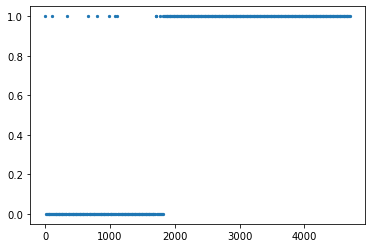

In [3]:
import numpy as np
import math

data_distribution = []
for i in range(len(ism)):
    if math.isnan(ism[i]) is True:
        data_distribution.append(0)
    else:
        data_distribution.append(1)

import matplotlib.pyplot as plt

plt.scatter([x for x in range(len(data_distribution))][::12],data_distribution[::12],s=5)

In [4]:
print(data_distribution[5:20])

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
data_distribution[5:20][::2]

[1, 1, 1, 1, 0, 0, 0, 0]